In [2]:
#donwload the dataset
!wget https://www.dropbox.com/s/qvglw8pqo16769f/pothole_dataset_v8.zip?dl=1 -O pothole_dataset_v8.zip

--2023-08-11 06:50:33--  https://www.dropbox.com/s/qvglw8pqo16769f/pothole_dataset_v8.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/qvglw8pqo16769f/pothole_dataset_v8.zip [following]
--2023-08-11 06:50:33--  https://www.dropbox.com/s/dl/qvglw8pqo16769f/pothole_dataset_v8.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb96963ddc620f5022e2921e272.dl.dropboxusercontent.com/cd/0/get/CBlEee_X1FyO9oJDZFyPhfjgeoXEc2JOWhpB2uClhhHHZtFBkgP1krMm4RMoyQyqwOBcnZ1BnR0-GbtELPCKTU9vJ9mBoHF8bNCFgd8-mtBDXGGxuxLzM_0ZTyTvYH-zfp6QRN0BCN8jBV0tNpFmPEI8/file?dl=1# [following]
--2023-08-11 06:50:33--  https://ucb96963ddc620f5022e2921e272.dl.dropboxusercontent.com/cd/0/get/CBlEee_X1FyO9oJDZFyPhfjgeoXEc2JOWhpB2uClhhHHZtFBkgP1krMm4RMoyQyqwOB

In [3]:
!unzip pothole_dataset_v8.zip

Streaming output truncated to the last 5000 lines.
  inflating: pothole_dataset_v8/train/images/Japan_009520.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009663.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009697.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009765.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009832.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009915.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009935.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010200.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010219.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010245.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010388.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010507.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010510.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010532.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_01

In [4]:
!pip install ultralytics clearml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.7/616.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.5 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [8]:
!clearml-init api{ web_server: https://app.clear.ml api_server: https://api.clear.ml files_server: https://files.clear.ml credentials {"access_key" = "I0H1W3XA05KRT7E43RGR" "secret_key"  = "rFDrLvXEdJSLSHYJo8vMIyWukxQEx2NaE56rZZbRTDQztlC68K" } }

usage: clearml-init
       [-h]
       [--file FILE]
clearml-init: error: unrecognized arguments: api{ web_server: https://app.clear.ml api_server: https://api.clear.ml files_server: https://files.clear.ml credentials {access_key = I0H1W3XA05KRT7E43RGR secret_key = rFDrLvXEdJSLSHYJo8vMIyWukxQEx2NaE56rZZbRTDQztlC68K } }


In [12]:
from ultralytics import YOLO

# Load the model.
model = YOLO('yolov8n.pt')

# Training.
results = model.train(
   data='/content/custom_data.yml',
   imgsz=640,
   epochs=10,
   batch=8,
   name='yolov8n_custom'
)


Ultralytics YOLOv8.0.152 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/custom_data.yml, epochs=10, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dyna

Text(0.5, 1.0, 'Fourth')

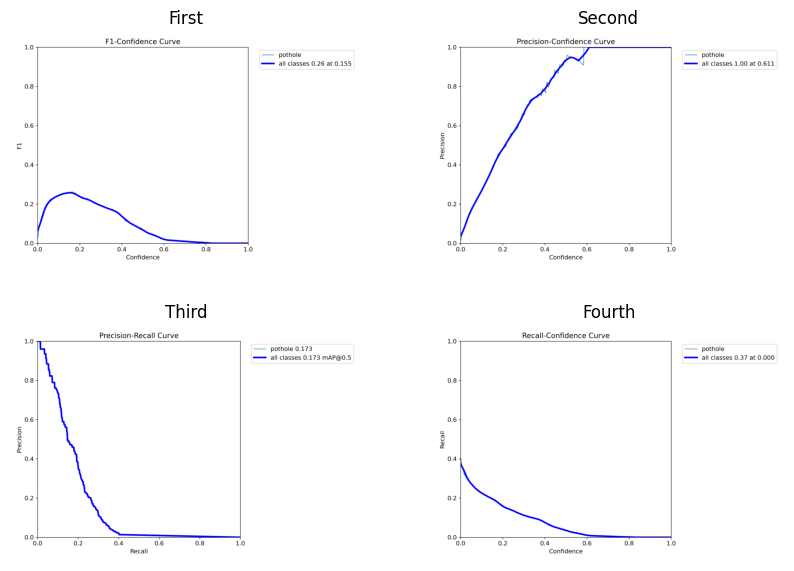

In [16]:
import matplotlib.pyplot as plt
from PIL import Image

img1 = Image.open('/content/runs/detect/yolov8n_custom3/F1_curve.png')
img2 = Image.open('/content/runs/detect/yolov8n_custom3/P_curve.png')
img3 = Image.open('/content/runs/detect/yolov8n_custom3/PR_curve.png')
img4 = Image.open('/content/runs/detect/yolov8n_custom3/R_curve.png')

fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("First")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Second")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(img3)
plt.axis('off')
plt.title("Third")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(img4)
plt.axis('off')
plt.title("Fourth")

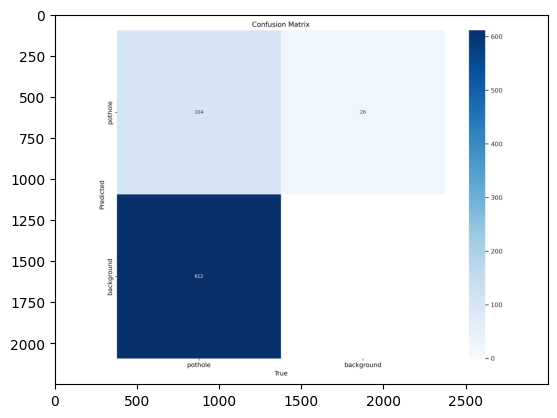

In [18]:
# confusion matrix
img1 = Image.open('/content/runs/detect/yolov8n_custom3/confusion_matrix.png')

plt.imshow(img1)

In [20]:
#training the small model
from ultralytics import YOLO

# Load the model.
model = YOLO('yolov8s.pt')

# Training.
results = model.train(
   data='/content/custom_data.yml',
   imgsz=640,
   epochs=30,
   batch=8,
   name='yolov8s_custom'
)



Ultralytics YOLOv8.0.152 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/custom_data.yml, epochs=30, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dyna

Text(0.5, 1.0, 'Fourth')

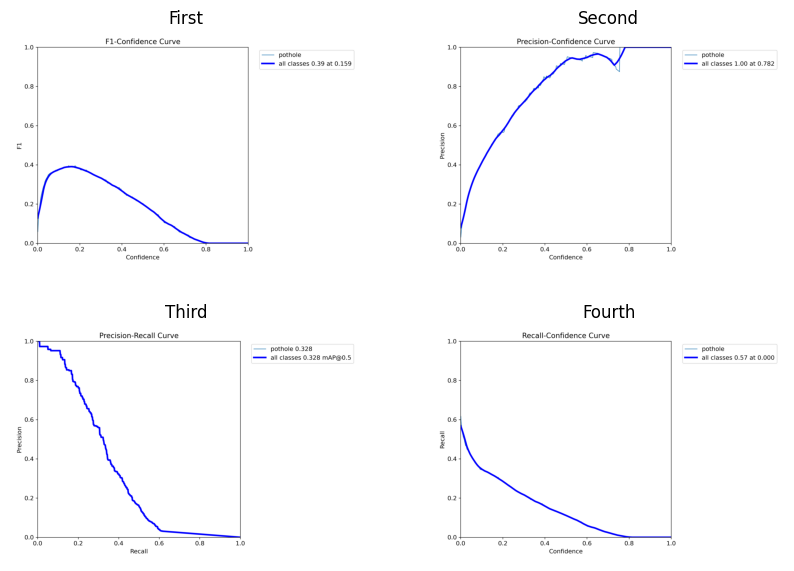

In [22]:
import matplotlib.pyplot as plt
from PIL import Image

img1 = Image.open('/content/runs/detect/yolov8s_custom2/F1_curve.png')
img2 = Image.open('/content/runs/detect/yolov8s_custom2/P_curve.png')
img3 = Image.open('/content/runs/detect/yolov8s_custom2/PR_curve.png')
img4 = Image.open('/content/runs/detect/yolov8s_custom2/R_curve.png')


fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("First")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Second")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(img3)
plt.axis('off')
plt.title("Third")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(img4)
plt.axis('off')
plt.title("Fourth")

Text(0.5, 1.0, 'Batch 1 prediction')

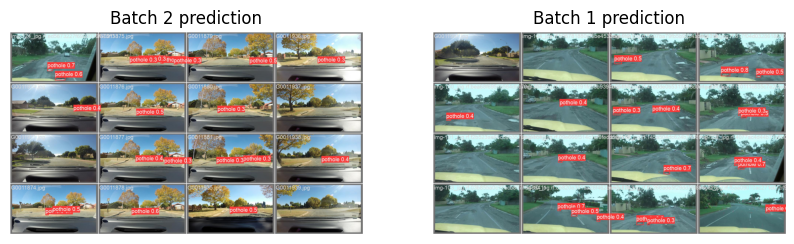

In [23]:
#output of the validation set on the model
import matplotlib.pyplot as plt
from PIL import Image

img1 = Image.open('/content/runs/detect/yolov8s_custom2/val_batch2_pred.jpg')
img2 = Image.open('/content/runs/detect/yolov8s_custom2/val_batch1_pred.jpg')

fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("Batch 2 prediction")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Batch 1 prediction")